# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# model
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# evaluation
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
dataset = load_diabetes()

In [3]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = pd.Series(dataset['target'], name='Price')

In [4]:
X.shape, y.shape

((442, 10), (442,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([itm.shape for itm in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(248, 10), (83, 10), (111, 10), (248,), (83,), (111,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [9]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
208,0.030811,-0.044642,0.040140,0.076958,0.017694,0.037830,-0.028674,0.034309,-0.001499,0.119043
130,-0.063635,0.050680,0.096186,0.104501,-0.002945,-0.004759,-0.006584,-0.002592,0.022692,0.073480
190,0.009016,-0.044642,-0.012673,0.028758,-0.018080,-0.005072,-0.047082,0.034309,0.023375,-0.005220
168,0.001751,0.050680,0.059541,-0.002228,0.061725,0.063195,-0.058127,0.108111,0.068982,0.127328
135,-0.005515,-0.044642,0.056307,-0.036656,-0.048351,-0.042963,-0.072854,0.037999,0.050782,0.056912


In [10]:
y_train.head()

208    155.0
130    274.0
190    292.0
168    268.0
135    272.0
Name: Price, dtype: float64

In [11]:
def show_missing_info(data):
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [12]:
show_missing_info(X_train)

,isnull,nunique,dtypes
age,0,55,float64
sex,0,2,float64
bmi,0,130,float64
bp,0,79,float64
s1,0,114,float64
s2,0,198,float64
s3,0,56,float64
s4,0,40,float64
s5,0,140,float64
s6,0,52,float64


# Model

In [13]:
model = RandomForestRegressor(n_estimators=100)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

In [16]:
print(f'Validation MAE: {val_mae:.6f}')

Validation MAE: 51.722771


# Evaluation 

In [17]:
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [18]:
print(f'Test MAE: {test_mae:.6f}')

Test MAE: 43.792252


In [19]:
print(f'y_test mean: {np.mean(y_test):.6f}, std: {np.std(y_test):.6f}')

y_test mean: 145.540541, std: 74.361884


Text(0.5, 0.98, 'y_test vs y_test_pred')

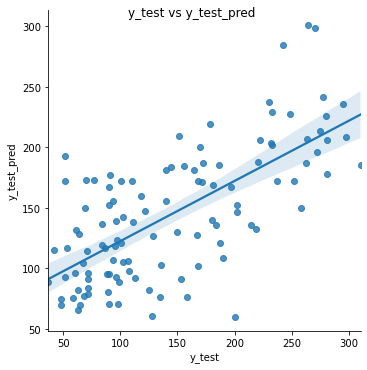

In [20]:
y_test_vs_pred = pd.concat([
    pd.Series(y_test, name='y_test'), 
    pd.Series(y_test_pred, name='y_test_pred', index=y_test.index),
], axis=1)
sns.lmplot(x='y_test', y='y_test_pred', data=y_test_vs_pred).\
    fig.suptitle('y_test vs y_test_pred')

In [21]:
y_test_vs_pred.corr()

,y_test,y_test_pred
y_test,1.000000,0.687066
y_test_pred,0.687066,1.000000


# Application

In [22]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    print(f'\nModel forecasted as {model.predict(X_test.iloc[idx:idx+1])[0]:.6f}')
    print(f'\nActual data should be {y_test.iloc[idx]:.6f}')

In [23]:
application()

Collected new features as follows:
age   -0.078165
sex    0.050680
bmi    0.077863
bp     0.052858
s1     0.078236
s2     0.064447
s3     0.026550
s4    -0.002592
s5     0.040672
s6    -0.009362
Name: 422, dtype: float64

Model forecasted as 229.590000

Actual data should be 233.000000
